In [1]:
import os, json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

### Define data paths

In [2]:
path_data = os.path.dirname(os.getcwd())+'/data/'
print(path_data)

/home/endrit_p/Documents/Spring23_CGG/data/


In [3]:
path_train_10x = path_data + "processed/train/10x/"
path_train_8x = path_data + "raw/CGG_data/train/8x/"
path_train_gt = path_data + "raw/CGG_data/train/gt/"
path_test_ge = path_data + "raw/CGG_data/ge_test/"
path_test_senti = path_data + "raw/CGG_data/senti_test/"

### Functions and testing

In [4]:
def load_image_as_np(input_img):
    '''
    Loads image using PIL (RGB convention) and converts to NumPy matrix
    Args:
        input_img: path to image file (str)
    Returns:
        NumPy matrix of image (H, W, C)
    '''
    if isinstance(input_img, str):
        input_img = Image.open(input_img)
        input_img = np.array(input_img)
        
    return input_img

In [5]:
img_test = load_image_as_np(path_train_10x + "1320.png")
print(type(img_test))
print(img_test.shape)

<class 'numpy.ndarray'>
(106, 103, 3)


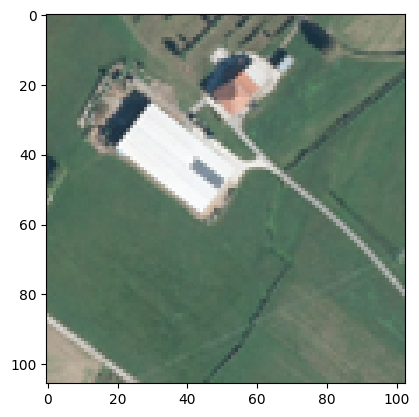

In [6]:
plt.imshow(img_test)

### Normalise (0 - 1)

In [7]:
def normalise_image(input_img):
    '''
    Divides all pixels in an input image by max pixel intensity (255)
    Args:
        input_img: image (as PIL image or NumPy matrix) or path to image (str)
    Returns:
        normalised image as NumPy matrix (H, W, C)
    '''
    if isinstance(input_img, str):
        input_img = load_image_as_np(input_img)
    else:
        input_img = np.array(input_img)
    
    img_norm = np.divide(input_img, 255)
    return img_norm

In [8]:
img_test_norm = normalise_image(img_test)
print(type(img_test_norm))
print(np.max(img_test_norm) == np.max(img_test)/255)
print(np.min(img_test_norm) == np.min(img_test)/255)

<class 'numpy.ndarray'>
True
True


In [9]:
img_test_norm = normalise_image(path_train_10x + "1320.png")
print(type(img_test_norm))
print(np.max(img_test_norm) == np.max(img_test)/255)
print(np.min(img_test_norm) == np.min(img_test)/255)

<class 'numpy.ndarray'>
True
True


In [10]:
img_test_norm.shape

(106, 103, 3)

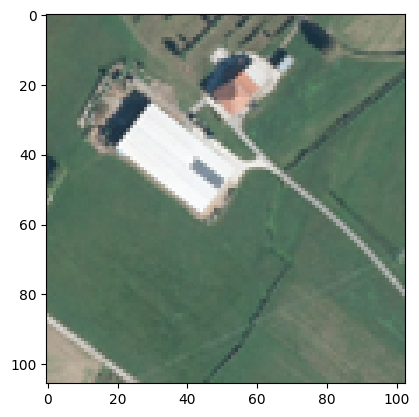

In [11]:
plt.imshow(img_test_norm)

### Padding

In [12]:
def pad_image(input_img, desired_size, **kwargs):
    '''
    given an input image, pads to the desired size and returns padded image
    Args:
        input_img: image (as PIL image or NumPy matrix) or path to image (str)
        desired_size: tuple (W, H)
    Keyword arguments (check np.pad docs):
        e.g. for zero padding: mode='constant', constant_values=0
    Returns:
        padded NumPy matrix (H, W, C)
    '''
    if isinstance(input_img, str):
        input_img = load_image_as_np(input_img)
    else:
        input_img = np.array(input_img)
    
    height, width = input_img.shape[0], input_img.shape[1]
    
    if desired_size[0] <= width or desired_size[1] <= height:
        raise ValueError("Desired size is equal or smaller than input image. Cannot pad.")
    
    padding_left  = (desired_size[0] - width)//2
    padding_right = desired_size[0] - width - padding_left
    padding_bot   = (desired_size[1] - height)//2
    padding_top   = desired_size[1] - height - padding_bot
    
    img_padded = np.pad(input_img, ((padding_bot, padding_top), (padding_left, padding_right), (0,0)), **kwargs)
    return img_padded

In [13]:
# height
img_test.shape[0]

106

In [14]:
# width
img_test.shape[1]

103

In [15]:
img_test_padded_zeros = pad_image(img_test, (150, 150), mode="constant", constant_values=0)
img_test_padded_edge  = pad_image(img_test, (150, 150), mode="edge")
img_test_padded_sym   = pad_image(img_test, (150, 150), mode="symmetric")

In [16]:
print(img_test_padded_zeros.shape)
print(img_test_padded_edge.shape)
print(img_test_padded_sym.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


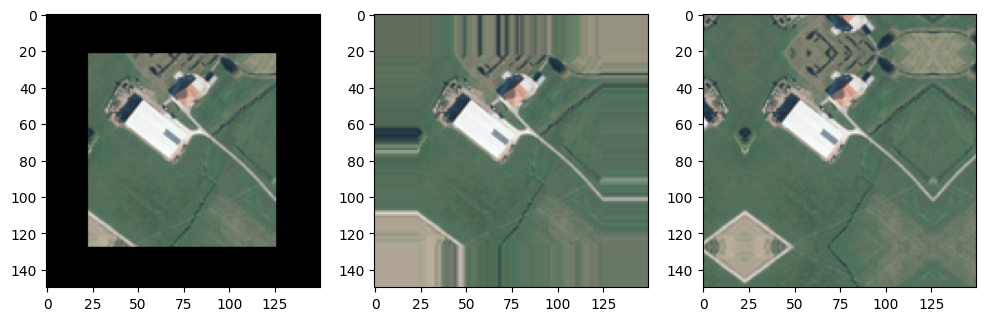

In [17]:
fig ,ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img_test_padded_zeros)
ax[1].imshow(img_test_padded_edge)
ax[2].imshow(img_test_padded_sym)

### Hanyuan code for downsampling

In [19]:
def generate_low_resolution_image(input_img, scale_factor):
    '''
    Hanyuan function for downsampling images with scale factor
    Args:
        input_image_file: image (as PIL image or NumPy matrix) or path to image (str)
        scale_factor: int or float to scale image by
    Returns:
        downsampled Numpy matrix (H, W, C)
    '''
    if isinstance(input_img, str):
        original_img = load_image_as_np(input_img)
    else:
        original_image = np.array(input_img)
    width, height = original_image.size
    new_width, new_height = int(width * scale_factor), int(height * scale_factor)
    low_resolution_image = original_image.resize((new_width, new_height))
    low_resolution_image = np.array(low_resolution_image)
    return low_resolution_image

### Resize image

In [20]:
def resize_image(input_img, desired_size, **kwargs):
    '''
    For a given image, resize it to the desired size
    Args:
        input_img: image (as PIL image or NumPy matrix) or path to image (str)
        desired_size: tuple (W, H)
    Keyword parameters:
        optional PIL params (see docs), e.g. interpolation=cv2.INTER_CUBIC
    Returns:
        resized NumPy matrix (H, W, C)
    '''
    if isinstance(input_img, str):
        input_img = load_image_as_np(input_img)
    else:
        input_img = np.array(input_img)
    
    img_resized = cv2.resize(input_img, dsize=desired_size, **kwargs)
    
    return img_resized

In [21]:
img_test.shape

(106, 103, 3)

In [22]:
img_test_resized = resize_image(img_test, (128, 128), interpolation=cv2.INTER_CUBIC)

In [23]:
img_test_resized.shape

(128, 128, 3)

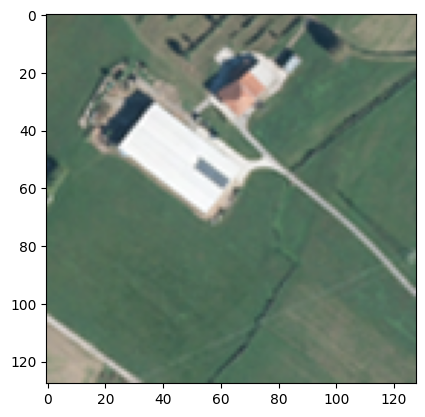

In [24]:
plt.imshow(img_test_resized)

### Load 20 images to test with

In [25]:
all_imgs = []
for fn in os.listdir(path_train_10x)[:20]:
    img = Image.open(path_train_10x + fn)
    img = resize_image(img, (128, 128))
    all_imgs.append(np.array(img))

In [26]:
all_imgs = np.array(all_imgs)

In [27]:
all_imgs.shape

(20, 128, 128, 3)

### Standardise with population mean and std

In [28]:
pop_mean = np.mean(all_imgs)

In [29]:
pop_std = np.std(all_imgs)

In [30]:
def standardise_image(input_img, mean, std):
    '''
    remove mean from image, scale by standard deviation
    Args:
        input_img: image (PIL image or NumPy matrix) or path to image (str)
        mean: population mean (float or int)
        std: population standard deviation (float or int)
    Returns:
        standardised image as NumPy matrix
    '''
    if isinstance(input_img, str):
        input_img = load_image_as_np(input_img)
    else:
        input_img = np.array(input_img)
    
    img_standard = np.subtract(input_img, mean)
    img_standard = np.divide(img_standard, std)
    return img_standard

In [31]:
def reverse_image_standardisation(input_img, mean, std):
    '''
    remove scaling by standard deviation, add mean
    Args:
        input_img: image (PIL image or NumPy matrix) or path to image (str)
        mean: population mean (float or int)
        std: population standard deviation (float or int)
    Returns:
        unstandardised image as NumPy matrix
    '''
    if isinstance(input_img, str):
        input_img = load_image_as_np(input_img)
    else:
        input_img = np.array(input_img)
    
    img_standard = np.multiply(input_img, std)
    img_standard = np.add(img_standard, mean)
    return img_standard.astype(int)

In [32]:
img_test_standardised = standardise_image(img_test, pop_mean, pop_std)
img_test_unstandardised = reverse_image_standardisation(img_test_standardised, pop_mean, pop_std)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[Text(0.5, 1.0, 'original subject')]

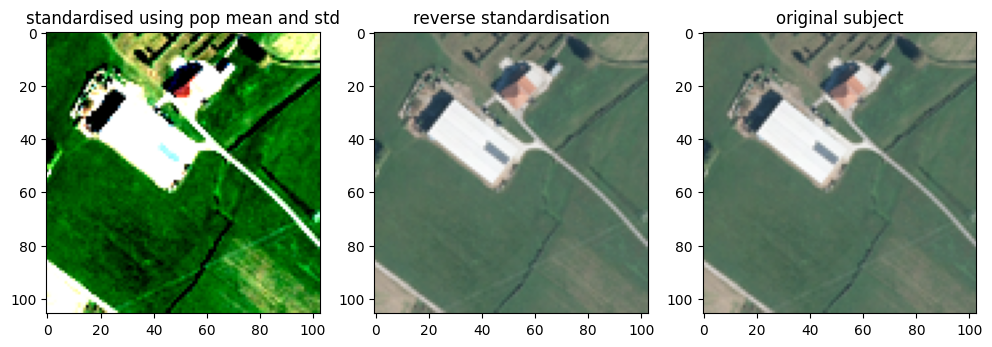

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img_test_standardised)
ax[0].set(title="standardised using pop mean and std")
ax[1].imshow(img_test_unstandardised)
ax[1].set(title="reverse standardisation")
ax[2].imshow(img_test)
ax[2].set(title="original subject")

### Compute stats in channel dimension

In [34]:
def compute_stats_channel_dim(input_images, channel):
    '''
    compute the mean and std for a RGB channel in a batch of images
    channel order: RGB (R=0, G=1, B=2)
    Args:
        input_images: NumPy array of images (each image also as NumPy matrix)
    Returns:
        tuple (mean, std)
    '''
    images = np.array(input_images)
        
    images_vectorised = np.reshape(images[:, :, :, channel], -1)
    mean = np.mean(images_vectorised)
    std  = np.std(images_vectorised)
    return mean, std

In [35]:
print(compute_stats_channel_dim(all_imgs, 0))
print(compute_stats_channel_dim(all_imgs, 1))
print(compute_stats_channel_dim(all_imgs, 2))

(96.99430236816406, 47.651715344019046)
(101.64328002929688, 39.889268461722004)
(89.98772888183593, 40.53034298607739)


### Compute percentage of green

(106, 103)
69.92123099468766


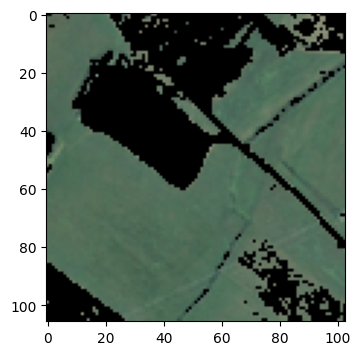

In [54]:
hsv_img = cv2.cvtColor(img_test,cv2.COLOR_RGB2HSV)
lower_green_hsv = np.array([30, 40, 40])
upper_green_hsv = np.array([80, 255, 255])

img_thresh = cv2.inRange(hsv_img, lower_green_hsv, upper_green_hsv)
img_res = cv2.bitwise_and(img_test, img_test, mask=img_thresh)

plt.figure(figsize=(10, 4))
plt.imshow(img_res)

In [55]:
def get_percentage_green(input_img):
    '''
    For a given image, convert to HSV, threshold with lower/upper green bounds (as defined in hsv)
    Compute percentage of image containing green pixels
    Args:
        input_img: image (as PIL image or NumPy matrix) or path to image (str)
    Returns:
        percentage (float) of image containing green pixels: e.g. 50.0 = 50%
    '''
    if isinstance(input_img, str):
        input_img = load_image_as_np(input_img)
    else:
        input_img = np.array(input_img)
    
    hsv_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2HSV)
    lower_green_hsv = np.array([30, 40, 40])
    upper_green_hsv = np.array([80, 255, 255])
    mask = cv2.inRange(hsv_img, lower_green_hsv, upper_green_hsv)
    percentage_green = (mask==255).mean()*100
    
    return percentage_green

### Masking edges in image and computing percentage

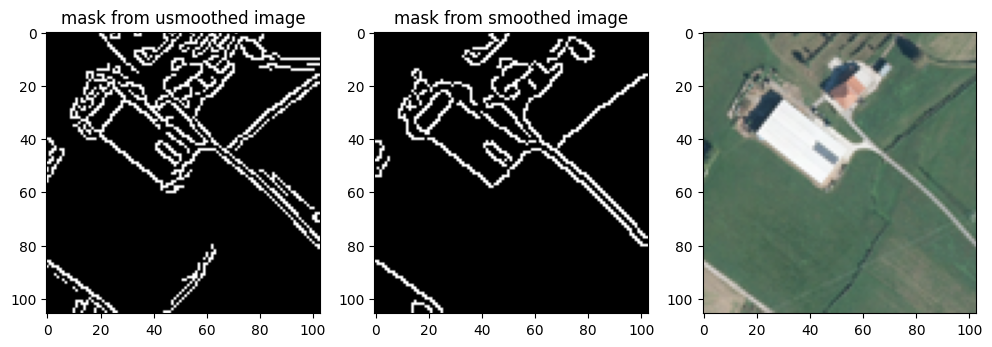

In [12]:
low_threshold = 50
high_threshold = 150

img_grey = cv2.cvtColor(img_test, cv2.COLOR_RGB2GRAY)
edges_grey = cv2.Canny(img_grey, low_threshold, high_threshold)

kernel_size = 5
img_blurred = cv2.GaussianBlur(img_grey, (kernel_size, kernel_size), 0)
edges_blurred = cv2.Canny(img_blurred, low_threshold, high_threshold)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(edges_grey, cmap='gray')
ax[0].set(title="mask from usmoothed image")
ax[1].imshow(edges_blurred, cmap='gray')
ax[1].set(title="mask from smoothed image")
ax[2].imshow(img_test)

In [13]:
def get_percentage_edges(input_img, low_threshold=50, high_threshold=150, kwd=5):
    '''
    For a given RGB image, convert to greyscale, threshold with lower/upper bounds
    Smooth and compute mask containing edges (opencv Canny function)
    Compute percentage of mask which is non-zero (edges)
    Args:
        input_img: image (as PIL image or NumPy matrix) or path to image (str)
        low_threshold (default=50): lowest value to clip greyscale mask
        upper_threshold (default=150): highest value to clip greyscale mask
        kwd: kernel width, e.g. kwd=5 results in a gaussian kernel (5, 5)
    Returns:
        percentage (float) of image containing edges: e.g. 50.0 = 50%
    '''
    if isinstance(input_img, str):
        input_img = load_image_as_np(input_img)
    else:
        input_img = np.array(input_img)
    
    img_grey = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
    img_blurred = cv2.GaussianBlur(img_grey, (kwd, kwd), 0)
    mask = cv2.Canny(img_blurred, low_threshold, high_threshold)
    percentage_edges = (mask==255).mean()*100
    
    return percentage_edges

In [15]:
get_percentage_edges(img_test)

8.050925077853087

In [16]:
img_pil = Image.fromarray(np.uint8(img_test))